In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

plt.style.use("default")


In [6]:
##Load Dataset

In [7]:
df = pd.read_csv("online_retail.csv", encoding="ISO-8859-1")

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
##Basic Data Understanding

In [9]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
##Data Cleaning

In [38]:
# Remove missing customer IDs
df = df.dropna(subset=["CustomerID"])

# Remove returns (negative quantity or price)
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Create new columns
df["Month"] = df["InvoiceDate"].dt.month
df["Year"] = df["InvoiceDate"].dt.year

# Create total sales column
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

df.head()
# df.to_csv("online_retail_cleaned.csv", index=False)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34


In [13]:
##Monthly Sales Analysis

In [14]:
monthly_sales = df.groupby("Month")["TotalSales"].sum().reset_index()

monthly_sales


,Month,TotalSales
0,1,569445.040
1,2,447137.350
2,3,595500.760
3,4,469200.361
4,5,678594.560
5,6,661213.690
6,7,600091.011
7,8,645343.900
8,9,952838.382
9,10,1039318.790


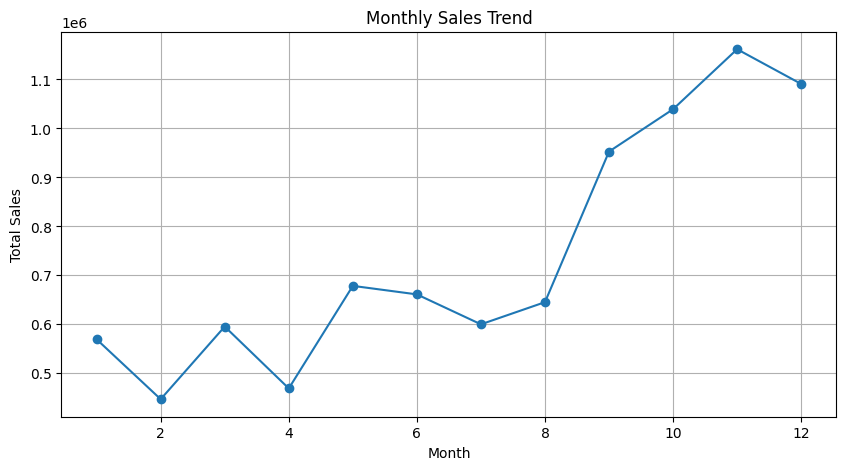

In [15]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Month"], monthly_sales["TotalSales"], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [17]:
##Best & Worst Months

In [18]:
best_month = monthly_sales.loc[monthly_sales["TotalSales"].idxmax()]
worst_month = monthly_sales.loc[monthly_sales["TotalSales"].idxmin()]

best_month, worst_month


(Month              11.00
 TotalSales    1161817.38
 Name: 10, dtype: float64,
 Month              2.00
 TotalSales    447137.35
 Name: 1, dtype: float64)

In [19]:
##Product-Level Sales Analysis

In [20]:
product_sales = df.groupby("Description")["TotalSales"].sum().reset_index()

# Top 10 products
top_products = product_sales.sort_values(by="TotalSales", ascending=False).head(10)

# Bottom 10 products
bottom_products = product_sales.sort_values(by="TotalSales").head(10)

top_products, bottom_products


(                             Description  TotalSales
 2319         PAPER CRAFT , LITTLE BIRDIE   168469.60
 2767            REGENCY CAKESTAND 3 TIER   142592.95
 3698  WHITE HANGING HEART T-LIGHT HOLDER   100448.15
 1762             JUMBO BAG RED RETROSPOT    85220.78
 1992      MEDIUM CERAMIC TOP STORAGE JAR    81416.73
 2611                             POSTAGE    77803.96
 2345                       PARTY BUNTING    68844.33
 216        ASSORTED COLOUR BIRD ORNAMENT    56580.34
 2130                              Manual    53779.93
 2656                  RABBIT NIGHT LIGHT    51346.20,
                               Description  TotalSales
 2275           PADS TO MATCH ALL CUSHIONS       0.003
 1628            HEN HOUSE W CHICK IN NEST       0.420
 2933      SET 12 COLOURING PENCILS DOILEY       0.650
 3556             VINTAGE BLUE TINSEL REEL       0.840
 2639           PURPLE FRANGIPANI HAIRCLIP       0.850
 2445      PINK CRYSTAL GUITAR PHONE CHARM       0.850
 638        CAT WITH

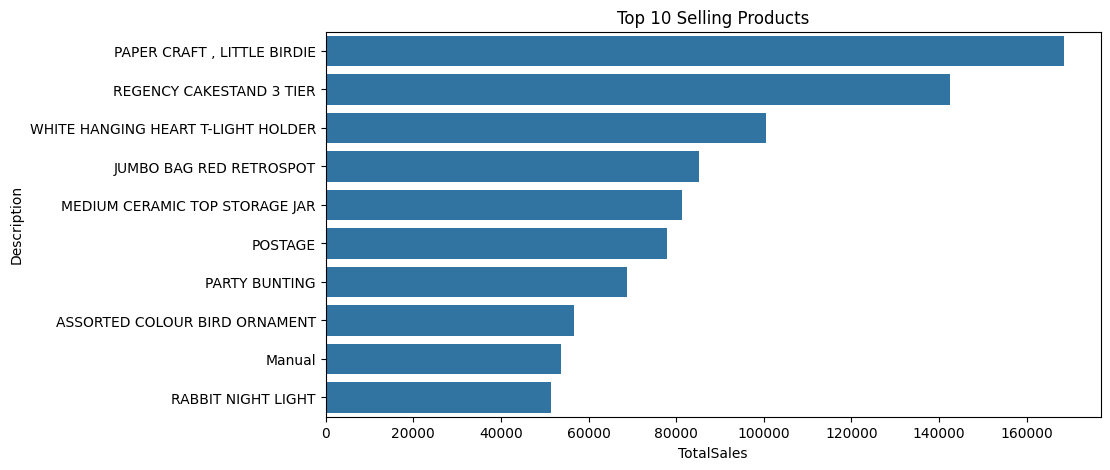

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x="TotalSales", y="Description", data=top_products)
plt.title("Top 10 Selling Products")
plt.show()


In [22]:
##Loss Month Detection

In [23]:
avg_monthly_sales = monthly_sales["TotalSales"].mean()

monthly_sales["Performance"] = monthly_sales["TotalSales"].apply(
    lambda x: "Loss Month" if x < avg_monthly_sales else "Profit Month"
)

monthly_sales


,Month,TotalSales,Performance
0,1,569445.040,Loss Month
1,2,447137.350,Loss Month
2,3,595500.760,Loss Month
3,4,469200.361,Loss Month
4,5,678594.560,Loss Month
5,6,661213.690,Loss Month
6,7,600091.011,Loss Month
7,8,645343.900,Loss Month
8,9,952838.382,Profit Month
9,10,1039318.790,Profit Month


In [24]:
##Discount Impact Simulation (Business Logic)

In [25]:
def simulate_discount(sales, discount_percent):
    demand_increase = discount_percent * 1.5  # assumption
    new_sales = sales * (1 + demand_increase/100)
    discount_loss = sales * (discount_percent/100)
    profit = new_sales - discount_loss
    return profit

monthly_sales["Profit_5%"] = monthly_sales["TotalSales"].apply(lambda x: simulate_discount(x, 5))
monthly_sales["Profit_10%"] = monthly_sales["TotalSales"].apply(lambda x: simulate_discount(x, 10))
monthly_sales["Profit_15%"] = monthly_sales["TotalSales"].apply(lambda x: simulate_discount(x, 15))

monthly_sales


,Month,TotalSales,Performance,Profit_5%,Profit_10%,Profit_15%
0,1,569445.040,Loss Month,5.836812e+05,5.979173e+05,6.121534e+05
1,2,447137.350,Loss Month,4.583158e+05,4.694942e+05,4.806727e+05
2,3,595500.760,Loss Month,6.103883e+05,6.252758e+05,6.401633e+05
3,4,469200.361,Loss Month,4.809304e+05,4.926604e+05,5.043904e+05
4,5,678594.560,Loss Month,6.955594e+05,7.125243e+05,7.294892e+05
5,6,661213.690,Loss Month,6.777440e+05,6.942744e+05,7.108047e+05
6,7,600091.011,Loss Month,6.150933e+05,6.300956e+05,6.450978e+05
7,8,645343.900,Loss Month,6.614775e+05,6.776111e+05,6.937447e+05
8,9,952838.382,Profit Month,9.766593e+05,1.000480e+06,1.024301e+06
9,10,1039318.790,Profit Month,1.065302e+06,1.091285e+06,1.117268e+06


In [26]:
##Machine Learning Model (Sales Prediction)

In [27]:
# Prepare dataset
ml_df = df[["Month", "Quantity", "UnitPrice", "TotalSales"]]

X = ml_df[["Month", "Quantity", "UnitPrice"]]
y = ml_df["TotalSales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.5225432571165634


In [28]:
##Discount Prediction Using ML

In [29]:
def predict_sales(month, quantity, price, discount):
    discounted_price = price * (1 - discount/100)
    return model.predict([[month, quantity, discounted_price]])[0]

predict_sales(month=2, quantity=10, price=20, discount=10)


C:\Users\AMBAN\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(34.85287390954636)

In [30]:
##GenAI-Ready Insight Generator (Text Output)

In [31]:
def generate_insight():
    return f"""
    Sales Analysis Summary:
    - Highest sales in Month {int(best_month.Month)}
    - Lowest sales in Month {int(worst_month.Month)}
    - Loss months detected below average sales
    - Recommended discount: 10–15% for low-performing months
    - Expected sales uplift: ~15–20%
    """

print(generate_insight())



    Sales Analysis Summary:
    - Highest sales in Month 11
    - Lowest sales in Month 2
    - Loss months detected below average sales
    - Recommended discount: 10–15% for low-performing months
    - Expected sales uplift: ~15–20%
    


In [32]:
# Monthly sales
monthly_sales = df.groupby(["Year", "Month"])["TotalSales"].sum().reset_index()

# Product sales
product_sales = df.groupby("Description")["TotalSales"].sum().reset_index()

monthly_sales.to_csv("monthly_sales.csv", index=False)
product_sales.to_csv("product_sales.csv", index=False)


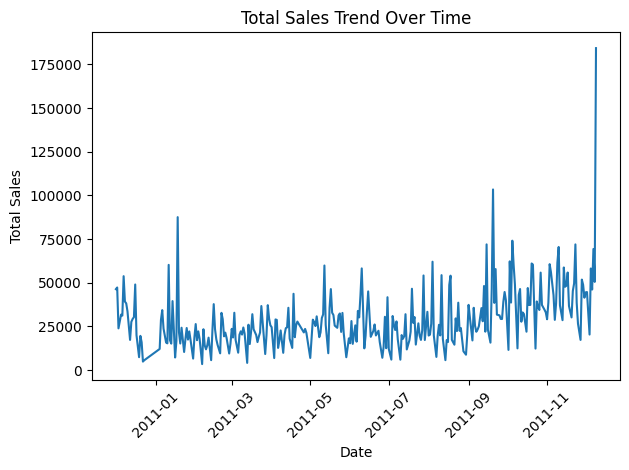

In [39]:
# Convert InvoiceDate to datetime (safe even if already converted)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate sales by date
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum()

plt.figure()
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Total Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


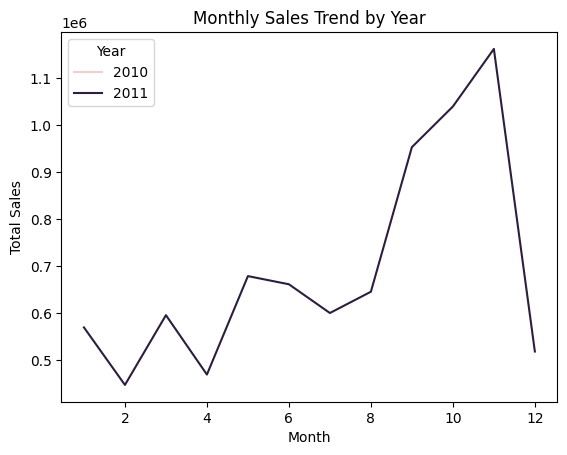

In [40]:
monthly_sales = df.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()

plt.figure()
sns.lineplot(data=monthly_sales, x='Month', y='TotalSales', hue='Year')
plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


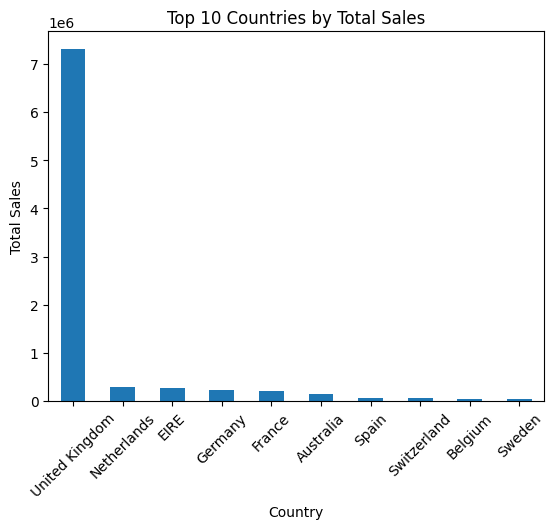

In [41]:
top_countries = (
    df.groupby('Country')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


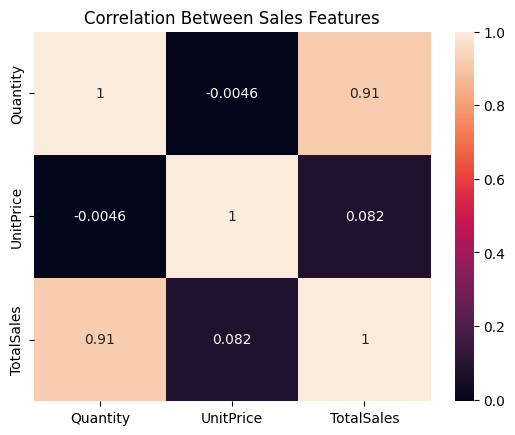

In [42]:
numeric_df = df[['Quantity', 'UnitPrice', 'TotalSales']]

plt.figure()
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Between Sales Features")
plt.show()


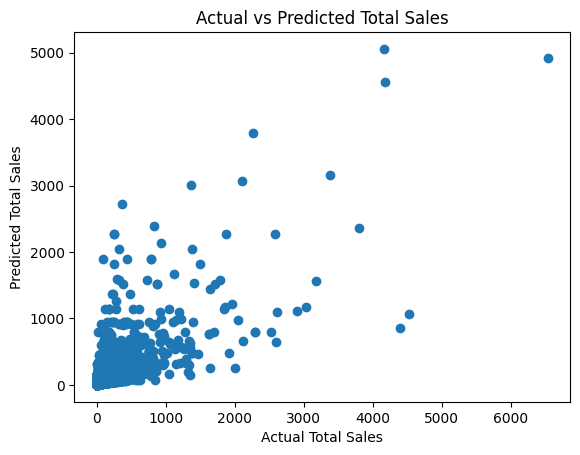

In [43]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Actual vs Predicted Total Sales")
plt.show()


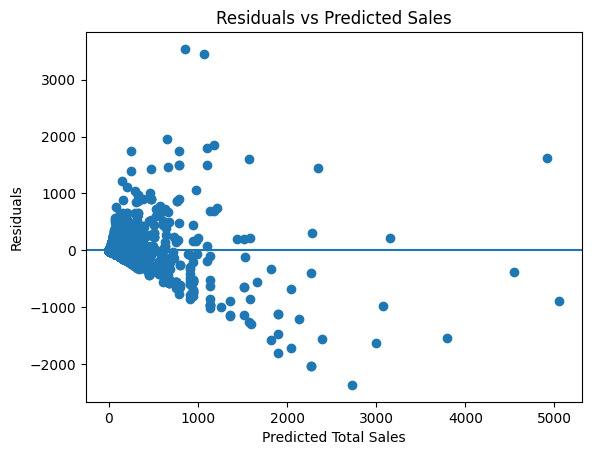

In [44]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Total Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.show()


In [45]:
# Create Quarter from Month
df['Quarter'] = pd.cut(
    df['Month'],
    bins=[0, 3, 6, 9, 12],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)


In [46]:
top_products = (
    df.groupby('Description')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top = df[df['Description'].isin(top_products)]


In [47]:
quarter_product_sales = (
    df_top
    .groupby(['Quarter', 'Description'])['TotalSales']
    .sum()
    .reset_index()
)


C:\Users\AMBAN\AppData\Local\Temp\ipykernel_21532\619928713.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Quarter', 'Description'])['TotalSales']


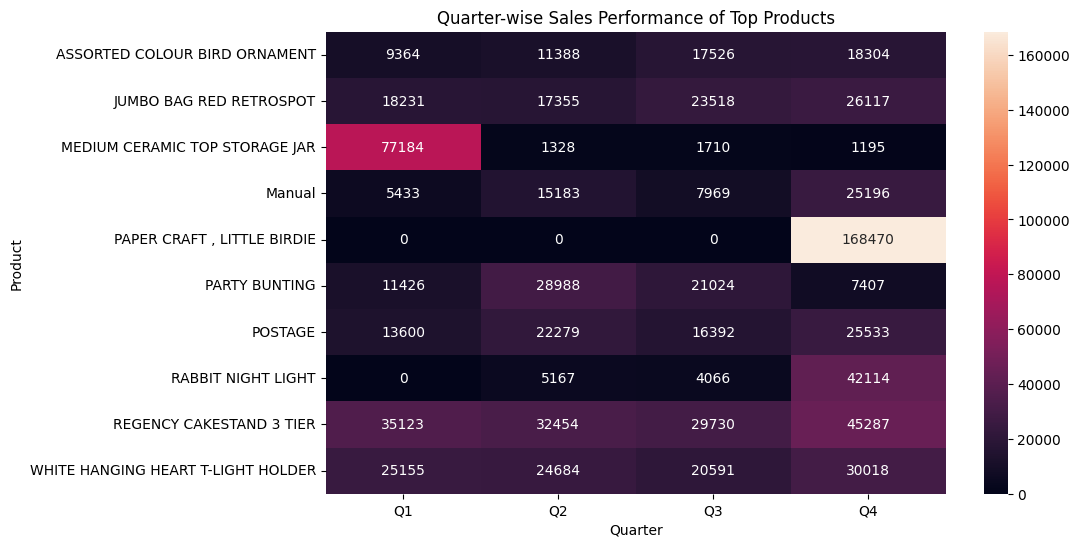

In [48]:
pivot_qp = quarter_product_sales.pivot(
    index='Description',
    columns='Quarter',
    values='TotalSales'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_qp, annot=True, fmt=".0f")
plt.title("Quarter-wise Sales Performance of Top Products")
plt.xlabel("Quarter")
plt.ylabel("Product")
plt.show()


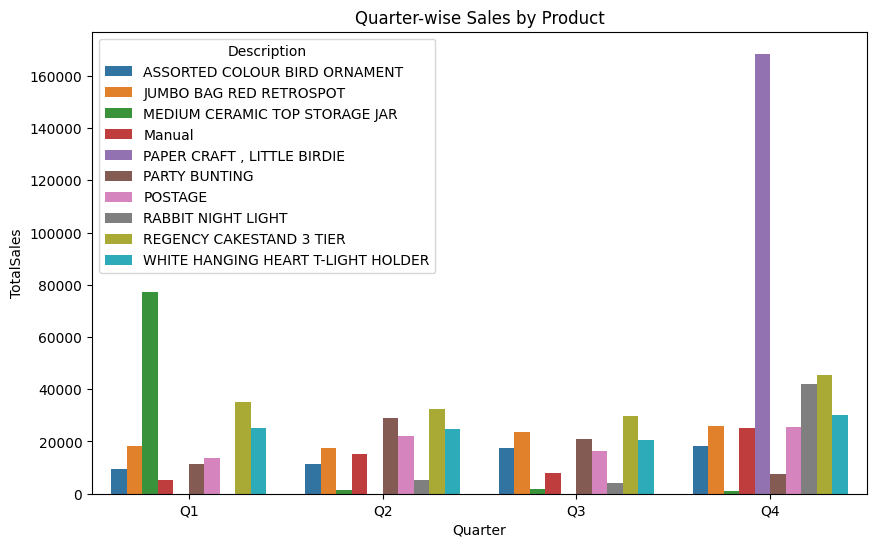

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=quarter_product_sales,
    x='Quarter',
    y='TotalSales',
    hue='Description'
)
plt.title("Quarter-wise Sales by Product")
plt.show()


In [51]:
quarterly_sales = (
    df_top
    .groupby(['Description', 'Quarter'])['TotalSales']
    .sum()
    .reset_index()
)


C:\Users\AMBAN\AppData\Local\Temp\ipykernel_21532\1084530625.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Description', 'Quarter'])['TotalSales']


In [52]:
best_quarter_per_product = (
    quarterly_sales
    .loc[quarterly_sales.groupby('Description')['TotalSales'].idxmax()]
    .sort_values('TotalSales', ascending=False)
)

best_quarter_per_product


,Description,Quarter,TotalSales
19,"PAPER CRAFT , LITTLE BIRDIE",Q4,168469.60
8,MEDIUM CERAMIC TOP STORAGE JAR,Q1,77183.60
35,REGENCY CAKESTAND 3 TIER,Q4,45286.62
31,RABBIT NIGHT LIGHT,Q4,42113.84
39,WHITE HANGING HEART T-LIGHT HOLDER,Q4,30018.21
21,PARTY BUNTING,Q2,28987.50
7,JUMBO BAG RED RETROSPOT,Q4,26116.65
27,POSTAGE,Q4,25533.45
15,Manual,Q4,25196.22
3,ASSORTED COLOUR BIRD ORNAMENT,Q4,18303.54


In [53]:
summary_table = best_quarter_per_product[
    ['Description', 'Quarter', 'TotalSales']
].rename(columns={
    'Description': 'Product',
    'Quarter': 'Best_Quarter',
    'TotalSales': 'Sales_in_Best_Quarter'
})

summary_table


,Product,Best_Quarter,Sales_in_Best_Quarter
19,"PAPER CRAFT , LITTLE BIRDIE",Q4,168469.60
8,MEDIUM CERAMIC TOP STORAGE JAR,Q1,77183.60
35,REGENCY CAKESTAND 3 TIER,Q4,45286.62
31,RABBIT NIGHT LIGHT,Q4,42113.84
39,WHITE HANGING HEART T-LIGHT HOLDER,Q4,30018.21
21,PARTY BUNTING,Q2,28987.50
7,JUMBO BAG RED RETROSPOT,Q4,26116.65
27,POSTAGE,Q4,25533.45
15,Manual,Q4,25196.22
3,ASSORTED COLOUR BIRD ORNAMENT,Q4,18303.54


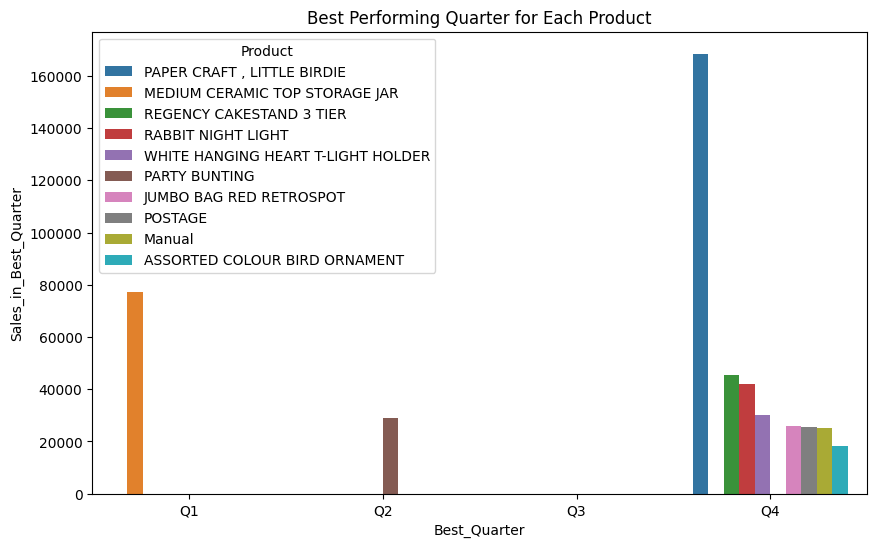

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary_table,
    x='Best_Quarter',
    y='Sales_in_Best_Quarter',
    hue='Product'
)
plt.title("Best Performing Quarter for Each Product")
plt.show()
